**SARIMA MODEL**



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

In [ ]:

df=pd.read_csv("/content/carbon_emission_data.csv")

df.drop('Code',axis=1,inplace=True)

df

,Entity,Year,Annual nitrous oxide emissions in CO₂ equivalents,Annual methane emissions in CO₂ equivalents,Annual CO₂ emissions,Total_GHG_emission
0,India,1850,20999728,200839070,122218824,344057622
1,India,1851,21421240,201611650,96143360,319176250
2,India,1852,21832280,202384880,83551416,307768576
3,India,1853,22226366,203158720,75527250,300912336
4,India,1854,22597016,203933180,69677070,296207266
...,...,...,...,...,...,...
167,India,2017,253388530,872071500,2495739100,3621199130
168,India,2018,259801040,875770100,2648225000,3783796140
169,India,2019,259914080,889505300,2666360300,3815779680
170,India,2020,268902340,892206850,2476962000,3638071190


In [ ]:
df.set_index('Year',inplace=True)

In [ ]:
df2=df[df['Year']<2001]
original_emission=df[df['Year']>=2001]
df2.set_index('Year', inplace=True)

# **Prediction_for_carbon_emission**

**using_addition-approach**

In [ ]:
# Fit a SARIMA model
def sarima_predict(x):
 order = (5, 4, 3)  # Adjust these values based on your data and model evaluation
 seasonal_order = (1, 1, 1, 12)
 model = SARIMAX(x, order=order, seasonal_order=seasonal_order)
 fit_model = model.fit(disp=False)

# Forecast for the next 21 years
 predicted_steps = 21
 predict = fit_model.get_forecast(steps=predicted_steps)
 predicted_index = np.arange(2001, 2022)

 predicted_values = predict.predicted_mean

 return predicted_values


In [ ]:
 predicted_index = np.arange(2001, 2022)
 predicted_index

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
data={'Annual nitrous oxide emissions in CO₂ equivalents':df2['Annual nitrous oxide emissions in CO₂ equivalents'],'Annual CO₂ emissions':df2['Annual CO₂ emissions'],'Annual methane emissions in CO₂ equivalents':df2['Annual methane emissions in CO₂ equivalents']}

In [ ]:
predicted_emissions = []

for key, value in data.items():
    print("predicted emissions for", key)
    predicted_emission = sarima_predict(value)
    predicted_emissions.append(predicted_emission)  # Store the predicted emissions

    for emission_value in predicted_emission:
        print(emission_value)


predicted emissions for Annual nitrous oxide emissions in CO₂ equivalents


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starti

187972600.15807623
186613333.50427634
187695246.07890484
189361782.58784127
188651498.17516708
189764623.07276848
189184846.7481063
189274368.41625395
188094104.2218612
186428101.596392
182813985.39729384
177802754.2182066
174999892.98939613
168670286.54505625
162581624.48425278
156210663.601047
148040040.07310933
139842291.20314723
130406181.85264458
120454546.57393885
108788820.29718274
predicted emissions for Annual CO₂ emissions


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported i

1154031236.1450496
1219673435.2131002
1257736142.0625055
1338135643.0776503
1421803681.865294
1482968489.8493211
1597706705.5502605
1677927582.9773738
1766199091.9748676
1860873243.7671742
1956010310.4907205
2078226463.231845
2212183239.736336
2327137912.4857063
2444907257.546163
2581951681.92689
2716420607.077059
2846251802.3422003
3014250120.8442273
3174688130.7142205
3328526287.6744
predicted emissions for Annual methane emissions in CO₂ equivalents


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


760614385.5909357
728852235.5301617
720759101.151464
713107971.0664597
702799880.9319813
693979088.0014344
689204015.0441867
681536627.5308111
673172129.6748301
661350873.1544776
649439100.9648412
634839520.6247517
619830905.0614598
570365177.9394287
542149564.795205
514169168.9693582
482554883.8610868
452605620.8308386
424883936.65759546
394101545.8349698
361580005.75566953


In [ ]:
# Access the first column of predicted emissions
x=df2[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']]
y=df2['Total_GHG_emission']
predict_emission=pd.DataFrame({'Annual nitrous oxide emissions in CO₂ equivalents':predicted_emissions[0],'Annual CO₂ emissions':predicted_emissions[1],'Annual methane emissions in CO₂ equivalents':predicted_emissions[2]})
predict_emissions=predict_emission[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']]

In [ ]:
predict_emission['Total_ghg_emission']=predict_emission['Annual nitrous oxide emissions in CO₂ equivalents']+predict_emission['Annual CO₂ emissions']+predict_emission['Annual methane emissions in CO₂ equivalents']
predict_emission['Total_ghg_emission']

151    2.102618e+09
152    2.135139e+09
153    2.166190e+09
154    2.240605e+09
155    2.313255e+09
156    2.366712e+09
157    2.476096e+09
158    2.548739e+09
159    2.627465e+09
160    2.708652e+09
161    2.788263e+09
162    2.890869e+09
163    3.007014e+09
164    3.066173e+09
165    3.149638e+09
166    3.252332e+09
167    3.347016e+09
168    3.438700e+09
169    3.569540e+09
170    3.689244e+09
171    3.798895e+09
Name: Total_ghg_emission, dtype: float64

**Using_linear_approach**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),('model',LinearRegression())])
pipe.fit(x,y)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [ ]:
linear_predicted_value=pipe.predict(predict_emissions)
linear_predicted_value

array([2.10261822e+09, 2.13513900e+09, 2.16619049e+09, 2.24060540e+09,
       2.31325506e+09, 2.36671220e+09, 2.47609557e+09, 2.54873858e+09,
       2.62746533e+09, 2.70865222e+09, 2.78826340e+09, 2.89086874e+09,
       3.00701404e+09, 3.06617338e+09, 3.14963845e+09, 3.25233151e+09,
       3.34701553e+09, 3.43869971e+09, 3.56954024e+09, 3.68924422e+09,
       3.79889511e+09])

**Using_the_direct_approach**

In [ ]:
predicted_value=sarima_predict(df2['Total_GHG_emission'])
predicted_value

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fail

151    2.090044e+09
152    2.144205e+09
153    2.188557e+09
154    2.279903e+09
155    2.332360e+09
156    2.397872e+09
157    2.489791e+09
158    2.581686e+09
159    2.655058e+09
160    2.722331e+09
161    2.814150e+09
162    2.918987e+09
163    3.028120e+09
164    3.117678e+09
165    3.204190e+09
166    3.321146e+09
167    3.418503e+09
168    3.519806e+09
169    3.649375e+09
170    3.775579e+09
171    3.886618e+09
Name: predicted_mean, dtype: float64

**using arimax model**

In [ ]:
train_data = df.iloc[:len(df) - 21]  # Use data up to the last 4 years as training data
test_data = df.iloc[len(df) - 21:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model = ARIMA(train_data['Total_GHG_emission'], exog=train_data[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']], order=(5, 2, 3))
results = model.fit()

# Make predictions
predictions = results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']])

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model1 = ARIMA(train_data['Total_GHG_emission'], order=(9, 5, 6))
results1 = model1.fit()

# Make predictions
predictions1 = results1.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Lstm**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data1 = pd.read_csv("/content/carbon_emission_data.csv")
data=data1[data1['Year']<2001]

# Select only the relevant columns for modeling
data = data[['Annual nitrous oxide emissions in CO₂ equivalents',
             'Annual methane emissions in CO₂ equivalents',
             'Annual CO₂ emissions',
             'Total_GHG_emission']]

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define input and target variables
X = scaled_data[:-1]  # Input variables (excluding the last year)
y = scaled_data[1:]   # Target variables (excluding the first year)

# Reshape the input data to fit the LSTM input shape (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=y.shape[1]))  # Output layer with units equal to number of output variables

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=2)

# Make predictions for the next 25 years
last_year_data = scaled_data[-1].reshape((1, 1, scaled_data.shape[1]))  # Use the last available year as input
predicted_values = []
for _ in range(21):
    next_year_prediction = model.predict(last_year_data)
    predicted_values.append(next_year_prediction.flatten())
    last_year_data = np.concatenate((last_year_data[:, 1:, :], next_year_prediction.reshape((1, 1, next_year_prediction.shape[1]))), axis=1)

# Inverse transform the scaled predictions
predicted_values = scaler.inverse_transform(predicted_values)

# Create a DataFrame to store the forecasted values
predict_df = pd.DataFrame(predicted_values, columns=data.columns)




Epoch 1/50
5/5 - 2s - loss: 0.1271 - 2s/epoch - 393ms/step
Epoch 2/50
5/5 - 0s - loss: 0.1148 - 19ms/epoch - 4ms/step
Epoch 3/50
5/5 - 0s - loss: 0.1019 - 20ms/epoch - 4ms/step
Epoch 4/50
5/5 - 0s - loss: 0.0911 - 19ms/epoch - 4ms/step
Epoch 5/50
5/5 - 0s - loss: 0.0796 - 19ms/epoch - 4ms/step
Epoch 6/50
5/5 - 0s - loss: 0.0703 - 20ms/epoch - 4ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0602 - 20ms/epoch - 4ms/step
Epoch 8/50
5/5 - 0s - loss: 0.0513 - 21ms/epoch - 4ms/step
Epoch 9/50
5/5 - 0s - loss: 0.0432 - 18ms/epoch - 4ms/step
Epoch 10/50
5/5 - 0s - loss: 0.0366 - 18ms/epoch - 4ms/step
Epoch 11/50
5/5 - 0s - loss: 0.0298 - 18ms/epoch - 4ms/step
Epoch 12/50
5/5 - 0s - loss: 0.0244 - 18ms/epoch - 4ms/step
Epoch 13/50
5/5 - 0s - loss: 0.0205 - 19ms/epoch - 4ms/step
Epoch 14/50
5/5 - 0s - loss: 0.0172 - 25ms/epoch - 5ms/step
Epoch 15/50
5/5 - 0s - loss: 0.0152 - 21ms/epoch - 4ms/step
Epoch 16/50
5/5 - 0s - loss: 0.0136 - 19ms/epoch - 4ms/step
Epoch 17/50
5/5 - 0s - loss: 0.0120 - 18ms/epoch 

In [ ]:
comparison=pd.DataFrame({'Year':original_emission['Year'],'original_emission':original_emission['Total_GHG_emission'],'Total_ghg_emission_direct':predicted_value,'Total_ghg_emission_linear':linear_predicted_value,'Total_ghg_emission_addition':predict_emission['Total_ghg_emission'],'Total_ghg_emission_arimax_exog':predictions,'Total_ghg_emission_arimax':predictions1})
comparison['Total_GHG_emission_lstm']=predict_df['Total_GHG_emission']

# saving the DataFrame as a CSV file
comparison = comparison.to_csv('comparison_prediced_ghg.csv', index = True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a dictionary to store metric values with custom names
metrics_dict = {}

# List containing different dataframes or series
data_list = [
    comparison['Total_ghg_emission_direct'],
    comparison['Total_ghg_emission_addition'],
    predict_df['Total_GHG_emission'],
    comparison['Total_ghg_emission_arimax_exog'],
    comparison['Total_ghg_emission_arimax']
]

# List containing custom names for each data item
data_names = [
    'Total_ghg_emission_direct_SARIMA',
    'Total_ghg_emission_addition_SARIMA',
    'lstm',
    'Total_ghg_emission_arimax_exog',
    'Total_ghg_emission_arimax'
]

# Iterate through each item in the list and its corresponding name
for data, data_name in zip(data_list, data_names):
    # Calculate metrics
    mse = mean_squared_error(comparison['original_emission'], data)
    mae = mean_absolute_error(comparison['original_emission'], data)
    r2 = r2_score(comparison['original_emission'], data)
    # Calculate adjusted R-squared
    n = len(comparison['original_emission'])
    rmse = np.sqrt(mse)
    # Store the metric values in the dictionary with the custom names
    metrics_dict[data_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'RMSE': rmse
    }
    # Print the metrics
    print(f"Metrics for {data_name}:")
    print(f"  MSE: {mse}")
    print(f"  MAE: {mae}")
    print(f"  R2: {r2}")
    print(f"  RMSE: {rmse}")

# Print the dictionary containing all metric values with custom names
print("Metrics Dictionary:")
print(metrics_dict)



Metrics for Total_ghg_emission_direct_SARIMA:
  MSE: 2.467685522629966e+16
  MAE: 138668750.51080364
  R2: 0.9391930609594895
  RMSE: 157088685.86343086
Metrics for Total_ghg_emission_addition_SARIMA:
  MSE: 3.552970362405361e+16
  MAE: 159426029.13032925
  R2: 0.9124502493294727
  RMSE: 188493245.56613058
Metrics for lstm:
  MSE: 9.04117515577439e+17
  MAE: 879977622.6228936
  R2: -1.2278616197651928
  RMSE: 950850942.8808697
Metrics for Total_ghg_emission_arimax_exog:
  MSE: 2.908702916621613e-07
  MAE: 0.000537895020984468
  R2: 1.0
  RMSE: 0.000539323920906686
Metrics for Total_ghg_emission_arimax:
  MSE: 2.628490096836622e+16
  MAE: 105112464.01152399
  R2: 0.9352306298265313
  RMSE: 162126188.41003516
Metrics Dictionary:
{'Total_ghg_emission_direct_SARIMA': {'MSE': 2.467685522629966e+16, 'MAE': 138668750.51080364, 'R2': 0.9391930609594895, 'RMSE': 157088685.86343086}, 'Total_ghg_emission_addition_SARIMA': {'MSE': 3.552970362405361e+16, 'MAE': 159426029.13032925, 'R2': 0.912450249

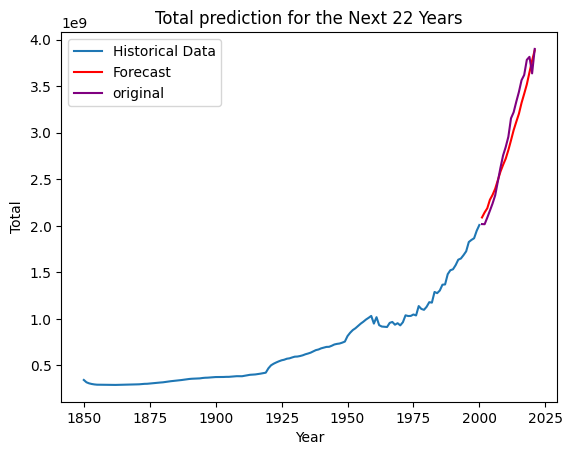

In [ ]:
plt.plot(df2.index, df2['Total_GHG_emission'], label='Historical Data')
plt.plot(predicted_index,comparison['Total_ghg_emission_direct'] , label='Forecast', color='red')
plt.plot(predicted_index,comparison['original_emission'] , label='original', color='purple')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total prediction for the Next 22 Years')
plt.legend()
plt.show()

# Forecast_for_carbon_emission


In [ ]:
def sarima_forecast(x):
 order = (3, 1, 1)  # Adjust these values based on your data and model evaluation
 seasonal_order = (1, 1, 1, 12)
 model = SARIMAX(x, order=order, seasonal_order=seasonal_order)
 fit_model = model.fit(disp=False)
 forecast_steps = 25
 forecast = fit_model.get_forecast(steps=forecast_steps)
 forecast_index = np.arange(2022, 2047)

 forecast_values = forecast.predicted_mean

 return forecast_values

In [ ]:
# Fit a SARIMA model
forecast_index = np.arange(2022, 2047)
data={'Annual nitrous oxide emissions in CO₂ equivalents':df['Annual nitrous oxide emissions in CO₂ equivalents'],'Annual CO₂ emissions':df['Annual CO₂ emissions'],'Annual methane emissions in CO₂ equivalents':df['Annual methane emissions in CO₂ equivalents']}

In [ ]:
forecasted_emissions = []

for key, value in data.items():
    print("Forecasted emissions for", key)
    forecasted_emission = sarima_forecast(value)
    forecasted_emissions.append(forecasted_emission)  # Store the forecasted emissions

    for emission_value in forecasted_emission:
        print(emission_value)



Forecasted emissions for Annual nitrous oxide emissions in CO₂ equivalents


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

277517142.080786
282506101.3921907
283546222.39430076
285301445.6373795
286436122.7677915
290149789.6953567
292598599.10903835
297341672.19984394
302647852.7872418
306297095.42584157
312035233.3360727
315970486.58998847
320419681.4303712
324809159.887109
325746527.7211628
327322650.6853318
328295129.1705919
331924191.1138748
334312226.9783913
338999739.42402655
344253976.2590606
347894624.5450556
353583444.52324265
357498618.4752827
361931721.5434686
Forecasted emissions for Annual CO₂ emissions


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2738733903.1850414
2687259889.712321
2799811981.714965
2842707676.3354883
2835146871.1316147
2889772840.8396235
2936757765.3493953
2964579550.7290373
3003113653.957487
3075071272.699029
3139010627.9365425
3186230767.868089
3224397081.554522
3276529111.7168236
3358096353.9731603
3407922554.1489177
3452660260.920647
3500537996.017457
3560322416.3857546
3598326961.2523594
3660943806.040658
3712782128.6393433
3707291237.589629
3807410090.6449933
3833430620.0684876
Forecasted emissions for Annual methane emissions in CO₂ equivalents
905699138.5402149
913414106.3806456
913835607.5495503
892743871.8374254
897588081.6319345
902644837.5305175
908012421.7915289
914991068.9430413
920775546.271874
932699557.0337584
935862989.0397693
940429256.3682361
948130318.724894
954978046.1440129
956138033.0606488
939956089.9269327
943885616.3486941
948493866.3427604
953466162.8636441
959942281.741074
967203451.2003076
977845714.4547441
981336126.4543843
985732459.9704744
992736507.3578194


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Access the first column of forecasted emissions
x=df[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']]
y=df['Total_GHG_emission']
forecast_emission=pd.DataFrame({'Annual nitrous oxide emissions in CO₂ equivalents':forecasted_emissions[0],'Annual CO₂ emissions':forecasted_emissions[1],'Annual methane emissions in CO₂ equivalents':forecasted_emissions[2]})
forecast_emissions=forecast_emission[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']]



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),('model',LinearRegression())])
pipe.fit(x,y)



Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [ ]:
ghg=pipe.predict(forecast_emissions)

In [ ]:
forecasted_value=sarima_forecast(df['Total_GHG_emission'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model = ARIMA(df['Total_GHG_emission'], order=(1, 1, 1))
results = model.fit()

# Make predictions
forecast = results.predict(start=len(df), end=len(df) + len(forecast_emissions) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model1 = ARIMA(df['Total_GHG_emission'], exog=df[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']], order=(5, 2, 3))
results1 = model1.fit()

# Make predictions
forecast1 = results1.predict(start=len(df), end=len(df) + len(forecast_emissions) - 1, exog=forecast_emissions[['Annual nitrous oxide emissions in CO₂ equivalents','Annual CO₂ emissions','Annual methane emissions in CO₂ equivalents']])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv("/content/carbon_emission_data.csv")

# Select only the relevant columns for modeling
data = data[['Annual nitrous oxide emissions in CO₂ equivalents',
             'Annual methane emissions in CO₂ equivalents',
             'Annual CO₂ emissions',
             'Total_GHG_emission']]

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define input and target variables
X = scaled_data[:-1]  # Input variables (excluding the last year)
y = scaled_data[1:]   # Target variables (excluding the first year)

# Reshape the input data to fit the LSTM input shape (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=y.shape[1]))  # Output layer with units equal to number of output variables

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=27, batch_size=32, verbose=2)

# Make predictions for the next 25 years
last_year_data = scaled_data[-1].reshape((1, 1, scaled_data.shape[1]))  # Use the last available year as input
predicted_values = []
for _ in range(25):
    next_year_prediction = model.predict(last_year_data)
    predicted_values.append(next_year_prediction.flatten())
    last_year_data = np.concatenate((last_year_data[:, 1:, :], next_year_prediction.reshape((1, 1, next_year_prediction.shape[1]))), axis=1)

# Inverse transform the scaled predictions
predicted_values = scaler.inverse_transform(predicted_values)

# Create a DataFrame to store the forecasted values
forecast_df = pd.DataFrame(predicted_values, columns=data.columns)

# Display the forecasted values for the next 25 years
print(forecast_df)

Epoch 1/27
6/6 - 2s - loss: 0.1235 - 2s/epoch - 400ms/step
Epoch 2/27
6/6 - 0s - loss: 0.1095 - 20ms/epoch - 3ms/step
Epoch 3/27
6/6 - 0s - loss: 0.0969 - 20ms/epoch - 3ms/step
Epoch 4/27
6/6 - 0s - loss: 0.0860 - 20ms/epoch - 3ms/step
Epoch 5/27
6/6 - 0s - loss: 0.0752 - 31ms/epoch - 5ms/step
Epoch 6/27
6/6 - 0s - loss: 0.0643 - 26ms/epoch - 4ms/step
Epoch 7/27
6/6 - 0s - loss: 0.0550 - 21ms/epoch - 3ms/step
Epoch 8/27
6/6 - 0s - loss: 0.0465 - 20ms/epoch - 3ms/step
Epoch 9/27
6/6 - 0s - loss: 0.0389 - 20ms/epoch - 3ms/step
Epoch 10/27
6/6 - 0s - loss: 0.0322 - 20ms/epoch - 3ms/step
Epoch 11/27
6/6 - 0s - loss: 0.0267 - 21ms/epoch - 3ms/step
Epoch 12/27
6/6 - 0s - loss: 0.0221 - 21ms/epoch - 4ms/step
Epoch 13/27
6/6 - 0s - loss: 0.0188 - 20ms/epoch - 3ms/step
Epoch 14/27
6/6 - 0s - loss: 0.0162 - 23ms/epoch - 4ms/step
Epoch 15/27
6/6 - 0s - loss: 0.0142 - 26ms/epoch - 4ms/step
Epoch 16/27
6/6 - 0s - loss: 0.0126 - 19ms/epoch - 3ms/step
Epoch 17/27
6/6 - 0s - loss: 0.0111 - 21ms/epoch 

In [ ]:
forecasted_total_ghg_emission=pd.DataFrame({'Year':forecast_index,"Forecasted_ghg_linear":ghg,'forecasted_ghg_direct':forecasted_value,'forecasted_ghg_arimax_exog':forecast,'forecasted_ghg_arimax':forecast1})
forecasted_total_ghg_emission = forecasted_total_ghg_emission.to_csv('comparison_forecast_ghg.csv', index = True)


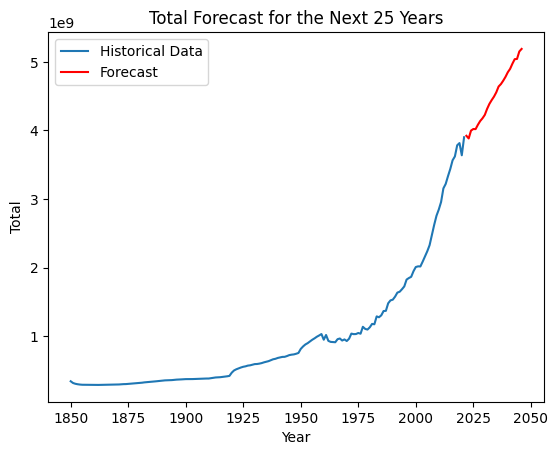

In [ ]:
plt.plot(df.index, df['Total_GHG_emission'], label='Historical Data')
plt.plot(forecast_index,ghg, label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Forecast for the Next 25 Years')
plt.legend()
plt.show()

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.6 MB/s eta 0:00:00


# **Prediction_for_forest_cover**

In [ ]:
import pandas as pd
df1=pd.read_csv("/content/forest_cover.csv")



In [ ]:
df5=pd.read_excel('/content/Forest_cover_in_india.xlsx')

In [ ]:
df3=df1[df1['YEAR']<2012]
original_forest=df1[df1['YEAR']>=2012]
df3.set_index('YEAR', inplace=True)

**interpolation_for_populating_forest_cover_data**

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Create interpolation function
interpolation_function = interp1d(df5['Year'],df5['TOTAL'], kind='linear', fill_value='extrapolate')

# Even years for which you want to find values
even_years = np.arange(1976, 2021, 2)

# Use interpolation function to estimate values for even years
values_even = interpolation_function(even_years)
values_even



In [ ]:
even_years = np.arange(1977,1980 , 2)
values_even = interpolation_function(even_years)
values_even

In [ ]:
even_years = np.arange(1983,1986 , 2)
values_even = interpolation_function(even_years)
values_even

**Using_addition_approach**

In [ ]:
# Fit a SARIMA model
def sarima_predict_F(x):
 order = (1, 2, 3)  # Adjust these values based on your data and model evaluation
 seasonal_order = (1, 1, 1, 12)
 model = SARIMAX(x, order=order, seasonal_order=seasonal_order)
 fit_model = model.fit(disp=False)

# Forecast for the next 21 years
 predicted_steps = 10
 predict = fit_model.get_forecast(steps=predicted_steps)
 predicted_index = np.arange(2012, 2022)

 predicted_values = predict.predicted_mean

 return predicted_values

In [ ]:
predicted_index = np.arange(2012, 2022)
data={'Very_Dense_forest':df3['VDF'],'Moderate_Dense_forest':df3['MDF'],'Open_forest':df3['OF']}


In [ ]:
predicted_forests = []

for key, value in data.items():
    print("Forecasted forest for", key)
    predicted_forest = sarima_predict_F(value)
    predicted_forests.append(predicted_forest)  # Store the forecasted emissions

    for predict_value in predicted_forest:
        print(predict_value)



Forecasted forest for Very_Dense_forest


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: Valu

79207.23495005861
75513.7449142202
67989.1950093055
60669.95431146578
74500.16710889296
88452.61046376216
88037.0063677691
87776.85581182843
87070.78053861423
86973.00841641473
Forecasted forest for Moderate_Dense_forest


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

348624.85402222164
375487.5461524172
366233.29034520464
356644.5430100723
342351.52254696906
328026.0727703
323961.4223124172
319887.56709807634
317428.42802703206
315037.57045859616
Forecasted forest for Open_forest
291022.3623129057
294397.2146243958
289069.5086580511
321971.15660124284
320413.48729693756
318880.7976696774
319340.1344398742
319831.12281703163
319740.53408568766
319369.01224873244


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predicted_forest=pd.DataFrame({'Very_Dense_forest':predicted_forests[0],'Moderate_dense_forest':predicted_forests[1],'Open_forest':predicted_forests[2]})

In [ ]:
predicted_forest['Total_forest_cover']=predicted_forest['Very_Dense_forest']+predicted_forest['Moderate_dense_forest']+predicted_forest['Open_forest']
predicted_forest['Total_forest_cover']

37    718854.451285
38    745398.505691
39    723291.994013
40    739285.653923
41    737265.176953
42    735359.480904
43    731338.563120
44    727495.545727
45    724239.742651
46    721379.591124
Name: Total_forest_cover, dtype: float64

**Using_direct_approach**

In [ ]:
predict_forest_cover=sarima_predict_F(df3['TOTAL'])
predict_forest_cover

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.

37    706453.646236
38    720881.285471
39    716825.853442
40    712769.845237
41    713377.906936
42    713986.032734
43    709280.096190
44    704574.234601
45    700410.842642
46    696246.041762
Name: predicted_mean, dtype: float64

**Arima_model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model = ARIMA(df3['TOTAL'], order=(1, 2, 3))
results = model.fit()

# Make predictions
Arima_prediction = results.predict(start=len(df3), end=len(df3) + len(predicted_forest) - 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model1 = ARIMA(df3['TOTAL'], exog=df3[['MDF','OF','VDF']], order=(1, 1, 1))
results1 = model1.fit()

# Make predictions
Arimax_prediction_exog = results1.predict(start=len(df3), end=len(df3) + len(original_forest) - 1, exog=original_forest[['MDF','OF','VDF']])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
comparison=pd.DataFrame({'Year':original_forest['YEAR'],'forest_cover_prediction_sarima_direct':predict_forest_cover,'forest_cover_prediction_sarima_addition':predicted_forest['Total_forest_cover'],'forest_cover_prediction_arima':Arima_prediction,'forest_cover_prediction_arima_exog':Arimax_prediction_exog})
comparison['Total_original_forest']=original_forest['TOTAL']
# saving the DataFrame as a CSV file
comparison = comparison.to_csv('comparison_prediced_forest_cover.csv', index = True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a dictionary to store metric values with custom names
metrics_dict = {}

# List containing different dataframes or series
data_list = [
    comparison['forest_cover_prediction_sarima_direct'],
    comparison['forest_cover_prediction_sarima_addition'],
    comparison['forest_cover_prediction_arima'],
    comparison['forest_cover_prediction_arima_exog']
]

# List containing custom names for each data item
data_names = [
    'forest_cover_prediction_sarima_direct_SARIMA',
    'forest_cover_prediction_sarima_SARIMA',
    'forest_cover_prediction_arimax_exog',
    'forest_cover_prediction_arimax'
]

# Iterate through each item in the list and its corresponding name
for data, data_name in zip(data_list, data_names):
    # Calculate metrics
    mse = mean_squared_error(comparison['Total_original_forest'], data)
    mae = mean_absolute_error(comparison['Total_original_forest'], data)
    r2 = r2_score(comparison['Total_original_forest'], data)
    # Calculate adjusted R-squared
    n = len(comparison['Total_original_forest'])
    rmse = np.sqrt(mse)
    # Store the metric values in the dictionary with the custom names
    metrics_dict[data_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'RMSE': rmse
    }
    # Print the metrics
    print(f"Metrics for {data_name}:")
    print(f"  MSE: {mse}")
    print(f"  MAE: {mae}")
    print(f"  R2: {r2}")
    print(f"  RMSE: {rmse}")

# Print the dictionary containing all metric values with custom names
print("Metrics Dictionary:")
print(metrics_dict)

Metrics for forest_cover_prediction_sarima_direct_SARIMA:
  MSE: 170707096.93882734
  MAE: 11571.53548611463
  R2: -3.1075180807023486
  RMSE: 13065.492602226192
Metrics for forest_cover_prediction_sarima_SARIMA:
  MSE: 745045436.4426779
  MAE: 24738.470539017453
  R2: -16.927125796238702
  RMSE: 27295.520446451974
Metrics for forest_cover_prediction_arimax_exog:
  MSE: 11788706.400398275
  MAE: 3189.18558041387
  R2: 0.7163426386128545
  RMSE: 3433.4685669739683
Metrics for forest_cover_prediction_arimax:
  MSE: 6212194.794118999
  MAE: 2415.7131483803505
  R2: 0.8505234820621859
  RMSE: 2492.4274902429956
Metrics Dictionary:
{'forest_cover_prediction_sarima_direct_SARIMA': {'MSE': 170707096.93882734, 'MAE': 11571.53548611463, 'R2': -3.1075180807023486, 'RMSE': 13065.492602226192}, 'forest_cover_prediction_sarima_SARIMA': {'MSE': 745045436.4426779, 'MAE': 24738.470539017453, 'R2': -16.927125796238702, 'RMSE': 27295.520446451974}, 'forest_cover_prediction_arimax_exog': {'MSE': 11788706

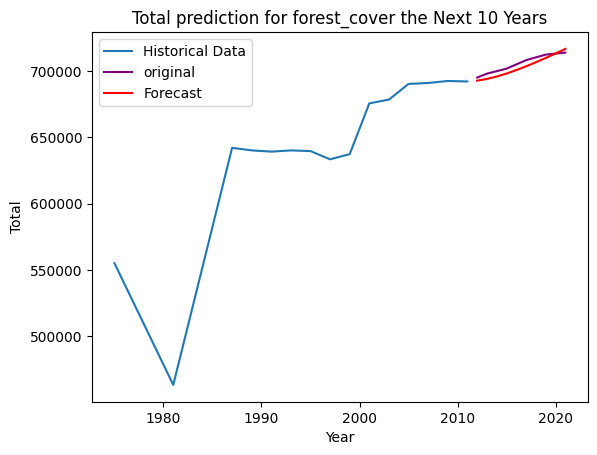

In [ ]:
plt.plot(df3.index, df3['TOTAL'], label='Historical Data')
plt.plot(predicted_index, comparison['Total_original_forest'], label='original', color='purple')
plt.plot(predicted_index, comparison['forest_cover_prediction_arima'], label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total prediction for forest_cover the Next 10 Years')
plt.legend()
plt.show()

# **Forecast_for_forest_cover**

In [94]:
forecast_index = np.arange(2022, 2047)
data={'Very_Dense_forest':df1['VDF'],'Moderate_Dense_forest':df1['MDF'],'Open_forest':df1['OF']}


In [95]:
forecasted_forests = []

for key, value in data.items():
    print("Forecasted forest for", key)
    forecasted_forest = sarima_forecast(value)
    forecasted_forests.append(forecasted_forest)  # Store the forecasted emissions

    for forest_value in forecasted_forest:
        print(forest_value)



Forecasted forest for Very_Dense_forest


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


99415.08120501552
103867.2501564985
103549.10914667368
103251.87166355338
103546.84727959745
103831.43205743078
109003.485617389
113933.43308808867
114710.59429926159
115389.9619180013
115392.20733859258
115578.07297610716
114993.20063930182
121874.76979061868
121374.7000494347
120906.61158207429
120706.03721721738
120489.42628572835
125139.2116787769
129414.48030134689
130310.40893743835
131055.05980092149
130921.25905879674
131072.04902555133
130366.33516952574
Forecasted forest for Moderate_Dense_forest


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


307722.0122264486
305970.7986706489
303379.67121018824
300751.0477141232
299545.96943711827
298333.5960329757
295329.2732295486
292281.65264355455
292353.5115416799
292403.07974455
291250.9698727672
290050.2095101268
290656.2613348596
289734.6286180152
287815.063725927
285828.44104618824
284457.11189941294
283070.1489291978
279836.92177202407
276576.7448473629
276683.20426623675
276776.0692275705
275757.67094184365
274708.67861721944
275398.4291763787
Forecasted forest for Open_forest


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


307255.8176323283
300428.41388977045
304247.340174037
307927.48752832855
310634.87704865506
312062.6596283172
313006.37633135985
313928.1234049856
314896.9222939296
315835.20645328506
316712.8035740893
317911.2471168746
317594.10426063655
316620.92354949785
320511.76042261143
324394.4975372271
326786.06783564814
329070.0641227014
329789.5975903036
330508.6805501221
331825.65668363846
333140.2865429657
334413.2418738887
335713.4437104997
335809.5773583397


In [96]:

forecasted_forest=pd.DataFrame({'year':forecast_index,'Very_Dense_forest':forecasted_forests[0],'Moderate_dense_forest':forecasted_forests[1],'Open_forest':forecasted_forests[2]})


In [97]:
forecasted_forest['total_forest_cover_addition']=forecasted_forest['Very_Dense_forest']+forecasted_forest['Moderate_dense_forest']+forecasted_forest['Open_forest']


In [98]:
forecast_forest_cover=sarima_forecast(df1['TOTAL'])
forecast_forest_cover

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


47    713809.804322
48    712562.236983
49    714899.702253
50    717225.939935
51    719154.589202
52    721079.143122
53    724200.955906
54    727322.180328
55    729377.559428
56    731432.213884
57    732095.267032
58    732759.649727
59    732736.147931
60    731722.825309
61    734194.877557
62    736655.383007
63    738576.428169
64    740493.292127
65    743634.301275
66    746774.746496
67    748835.016121
68    750894.713697
69    751580.886186
70    752268.102283
71    752254.179039
Name: predicted_mean, dtype: float64

In [99]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model1 = ARIMA(df1['TOTAL'], exog=df1[['MDF','OF','VDF']], order=(1, 1, 1))
results1 = model1.fit()

# Make predictions
Arimax_forecast_exog = results1.predict(start=len(df1), end=len(df1) + len(forecasted_forest) - 1, exog=forecasted_forest[['Very_Dense_forest','Moderate_dense_forest','Open_forest']])

In [100]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMAX model
model = ARIMA(df1['TOTAL'], order=(1, 2, 3))
results = model.fit()

# Make predictions
Arima_forecast = results.predict(start=len(df3), end=len(df1) + len(forecasted_forest) - 1)

In [101]:
forecasted_forest["total_forest_cover_direct"]=forecast_forest_cover
forecasted_forest['total_forest_cover_arima_exog']=Arimax_forecast_exog
forecasted_forest['total_forest_cover_arima']=Arima_forecast

comparison = forecasted_forest.to_csv('comparison_forecasted_forest_cover.csv', index = True)

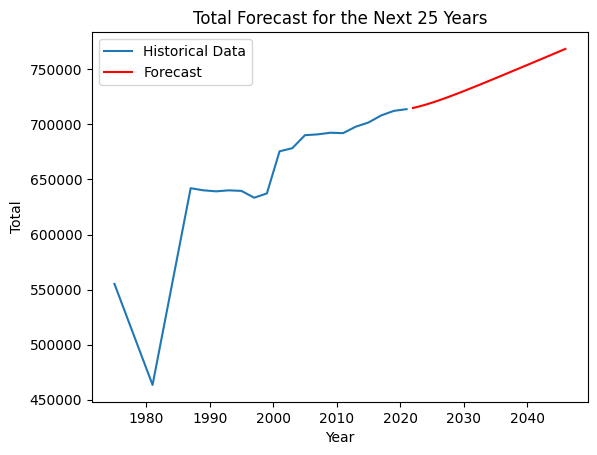

In [103]:
plt.plot(df1['YEAR'], df1['TOTAL'], label='Historical Data')
plt.plot(forecast_index, forecasted_forest['total_forest_cover_arima'], label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Forecast for the Next 25 Years')
plt.legend()
plt.show()

In [ ]:
df4=pd.read_csv("/content/carbon_sequestration.csv")

df4.columns=['Year','forest_cover','Carbon_seqestration']
df4

In [ ]:
#the carbon sequestartion in the year 2021 is 39.70000 million tonnes
#the carbon emission is 3.9 billion tonnes
#the forest cover is 713789
x=713789*3900/39.7
x

70120329.97481108

In [104]:
share_of_energy_Cons=pd.read_csv('/content/modern-renewable-energy-consumption (1).csv')
S_E=share_of_energy_Cons[['Entity','Year','Other renewables (including geothermal and biomass) electricity generation - TWh','Solar generation - TWh','Wind generation - TWh','Hydro generation - TWh']]
S_E=S_E[S_E['Entity']=='India'].dropna()
S_E.set_index('Year',inplace=True)
S_E['Total']=S_E.iloc[:,1:].sum(axis=1)
S_E

,Entity,Other renewables (including geothermal and biomass) electricity generation - TWh,Solar generation - TWh,Wind generation - TWh,Hydro generation - TWh,Total
Year,,,,,,
1971,India,0.000000,0.000000,0.000000,33.384148,33.384148
1972,India,0.000000,0.000000,0.000000,32.403040,32.403040
1973,India,0.000000,0.000000,0.000000,34.506676,34.506676
1974,India,0.000000,0.000000,0.000000,33.202953,33.202953
1975,India,0.000000,0.000000,0.000000,39.668533,39.668533
1976,India,0.000000,0.000000,0.000000,41.498165,41.498165
1977,India,0.000000,0.000000,0.000000,45.276752,45.276752
1978,India,0.000000,0.000000,0.000000,56.174990,56.174990
1979,India,0.000000,0.000000,0.000000,54.168587,54.168587


In [106]:
share_of_renewable=pd.read_csv('/content/renewable-share-energy (1).csv')
share_of_renewable.drop('Code',axis=1,inplace=True)
s_r=share_of_renewable[share_of_renewable['Entity']=='India'].dropna()
s_r.set_index('Year',inplace=True)
s_r

,Entity,Renewables (% equivalent primary energy)
Year,,
1965,India,9.149455
1966,India,9.270713
1967,India,10.058605
1968,India,10.857532
1969,India,10.873966
1970,India,11.784120
1971,India,12.426771
1972,India,11.463117
1973,India,11.957463


In [114]:
share_electricity_renewables=pd.read_csv('/content/share-electricity-renewables.csv')
share_electricity_renewables.drop('Code',axis=1,inplace=True)
s_e_r=share_electricity_renewables[share_electricity_renewables['Entity']=='India'].dropna()
s_e_r.set_index('Year',inplace=True)
s_e_r

,Entity,Renewables - % electricity
Year,,
1985,India,27.798811
1986,India,25.937187
1987,India,21.890574
1988,India,22.633194
1989,India,23.259535
1990,India,23.097132
1991,India,23.131563
1992,India,20.841738
1993,India,19.625616


In [115]:
hydro=S_E[['Hydro generation - TWh']]

In [117]:
wind_share_energy=pd.read_csv('/content/wind-share-energy.csv')
wind_share_energy.drop('Code',axis=1,inplace=True)
w_s_e=wind_share_energy[wind_share_energy['Entity']=='India'].dropna()
w_s_e.set_index('Year',inplace=True)

solar_share_energy=pd.read_csv('/content/solar-share-energy.csv')
solar_share_energy.drop('Code',axis=1,inplace=True)
s_s_e=solar_share_energy[solar_share_energy['Entity']=='India'].dropna()
s_s_e.set_index('Year',inplace=True)

hydro_share_energy=pd.read_csv('/content/hydro-share-energy.csv')
hydro_share_energy.drop('Code',axis=1,inplace=True)
h_s_e=hydro_share_energy[hydro_share_energy['Entity']=='India'].dropna()
h_s_e.set_index('Year',inplace=True)



In [118]:
year=np.arange(1965, 2023)
energy_share_percentage=pd.DataFrame({'Year':year,'hydro_share_energy':h_s_e['Hydro (% equivalent primary energy)'],'solar_share_energy':s_s_e['Solar (% equivalent primary energy)'],'wind_share_energy':w_s_e['Wind (% equivalent primary energy)']})
energy_share_percentage=energy_share_percentage.replace(np.nan,0).iloc[:,1:]
energy_share_percentage['Total_renewable_energy_share(excluding geothermal and biomass)']=energy_share_percentage.sum(axis=1)
energy_share_percentage

,hydro_share_energy,solar_share_energy,wind_share_energy,Total_renewable_energy_share(excluding geothermal and biomass)
Year,,,,
1965,9.149455,0.000000,0.000000,9.149455
1966,9.270713,0.000000,0.000000,9.270713
1967,10.058605,0.000000,0.000000,10.058605
1968,10.857532,0.000000,0.000000,10.857532
1969,10.873966,0.000000,0.000000,10.873966
1970,11.784120,0.000000,0.000000,11.784120
1971,12.426771,0.000000,0.000000,12.426771
1972,11.463117,0.000000,0.000000,11.463117
1973,11.957463,0.000000,0.000000,11.957463


In [119]:
energy_share_percentage['Total_renewable_energy_share(including geothermal and biomass)']=s_r['Renewables (% equivalent primary energy)']
energy_share_percentage['geothermal_and_biomass_share_energy']=energy_share_percentage['Total_renewable_energy_share(including geothermal and biomass)']-energy_share_percentage['Total_renewable_energy_share(excluding geothermal and biomass)']
energy_share_percentage.drop('Total_renewable_energy_share(excluding geothermal and biomass)',axis=1,inplace=True)

In [120]:

column1 = 'geothermal_and_biomass_share_energy'
column2 = 'Total_renewable_energy_share(including geothermal and biomass)'

index1 = energy_share_percentage.columns.get_loc(column1)
index2 = energy_share_percentage.columns.get_loc(column2)


energy_share_percentage.iloc[:, [index1, index2]] = energy_share_percentage.iloc[:, [index2, index1]].values




In [121]:
# Rename multiple columns
column_mapping = {'Total_renewable_energy_share(including geothermal and biomass)': 'geothermal_and_biomass_share_energy', 'geothermal_and_biomass_share_energy': 'Total_renewable_energy_share(including geothermal and biomass)'}
energy_share_percentage.rename(columns=column_mapping, inplace=True)
energy_share_percentage

,hydro_share_energy,solar_share_energy,wind_share_energy,geothermal_and_biomass_share_energy,Total_renewable_energy_share(including geothermal and biomass)
Year,,,,,
1965,9.149455,0.000000,0.000000,0.000000,9.149455
1966,9.270713,0.000000,0.000000,0.000000,9.270713
1967,10.058605,0.000000,0.000000,0.000000,10.058605
1968,10.857532,0.000000,0.000000,0.000000,10.857532
1969,10.873966,0.000000,0.000000,0.000000,10.873966
1970,11.784120,0.000000,0.000000,0.000000,11.784120
1971,12.426771,0.000000,0.000000,0.000000,12.426771
1972,11.463117,0.000000,0.000000,0.000000,11.463117
1973,11.957463,0.000000,0.000000,0.000000,11.957463
